In [1]:
import pymc
import numpy as np
import sklearn.datasets
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data

### 1.1 Boston Housing Prices

In [2]:
boston_prices = sklearn.datasets.load_boston()

In [35]:
X = boston_prices['data']
features = boston_prices['feature_names']
y_price = boston_prices['target']

In [4]:
boston_prices.viewkeys()

dict_keys(['data', 'feature_names', 'DESCR', 'target'])

In [5]:
print X.shape
print y.shape

(506, 13)
(506,)


In [6]:
boston_prices['DESCR']

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [7]:
# NOX      nitric oxides concentration (parts per 10 million)

X_nox = X[:, 4] 

### 1.2 Automobile

In [4]:
automobile = pd.read_csv('imports-85.data', header=None)

In [5]:
automobile.head()

# Description: http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
price = automobile.ix[:, 25]

not_null = price != '?'

price = price[not_null]

engine_size = automobile.ix[:, 16]
engine_size = engine_size[not_null]

X_engine_size = np.array([float(a) for a in engine_size])
y_car_price = np.array([float(a) for a in price])

In [20]:
print (X_engine_size.shape, y_car_price.shape)

((201,), (201,))


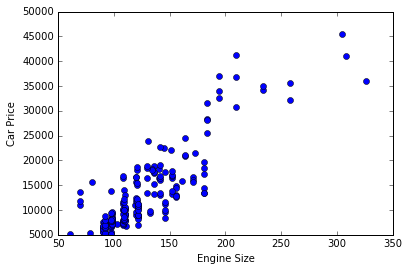

In [22]:
plt.plot(X_engine_size, y_car_price, 'o')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')

### 1.3 Sigmoid

In [122]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

X_all_sig = np.arange(-10, 10, 0.05)
print X_all_sig.shape

(400,)


In [170]:
X_sig = np.random.choice(X_all_sig, 200)
y_sig = sigmoid(X_sig)

In [171]:
X_sig.shape

(200,)

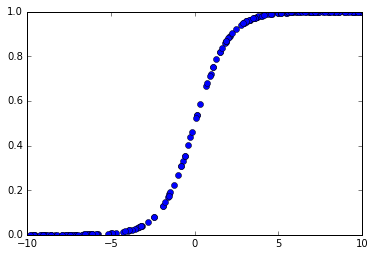

In [172]:
plt.plot(X_sig, y_sig, 'o')

## 2. Model Setup: y = a0 + a1 * x

In [173]:
a0 = pymc.Normal('a0', 0, 0.001)
a1 = pymc.Normal('a1', 0, 0.001)

In [174]:
X = pymc.Normal('nox', 0, 1, value = X_sig, observed = True)

In [175]:
@pymc.deterministic
def linear_model(a0 = a0, a1 = a1, x = X_sig):
    return a0 + a1 * x

In [176]:
y = pymc.Normal('price', linear_model, 1, value = y_sig, observed = True)

In [177]:
model = pymc.Model([linear_model, a0, a1, y_sig, X_sig])

## 3. Learning: MCMC

In [178]:
mcmc = pymc.MCMC(model)

In [179]:
mcmc.sample(50000, 20000)

 [-----------------100%-----------------] 50000 of 50000 complete in 6.6 sec

(array([  2.00000000e+00,   3.00000000e+00,   1.30000000e+01,
          2.10000000e+01,   6.20000000e+01,   1.42000000e+02,
          2.90000000e+02,   4.56000000e+02,   7.07000000e+02,
          1.02800000e+03,   1.50300000e+03,   2.18100000e+03,
          2.91500000e+03,   2.92200000e+03,   3.11000000e+03,
          2.87400000e+03,   2.94500000e+03,   2.46600000e+03,
          1.89500000e+03,   1.62200000e+03,   1.13100000e+03,
          8.00000000e+02,   3.74000000e+02,   2.81000000e+02,
          1.28000000e+02,   5.70000000e+01,   5.70000000e+01,
          6.00000000e+00,   3.00000000e+00,   6.00000000e+00]),
 array([ 0.02448353,  0.027519  ,  0.03055446,  0.03358993,  0.03662539,
         0.03966086,  0.04269632,  0.04573179,  0.04876725,  0.05180272,
         0.05483818,  0.05787365,  0.06090911,  0.06394458,  0.06698004,
         0.07001551,  0.07305097,  0.07608644,  0.0791219 ,  0.08215737,
         0.08519283,  0.0882283 ,  0.09126376,  0.09429923,  0.09733469,
         0.10

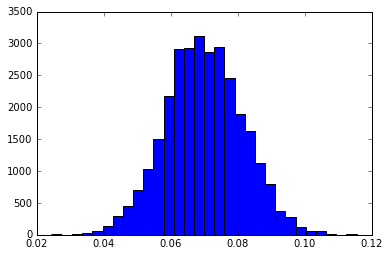

In [180]:
# Posterior of 'a1'

plt.hist(mcmc.trace('a1')[:], bins=30)

(array([  4.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          3.60000000e+01,   3.40000000e+01,   1.10000000e+02,
          2.81000000e+02,   4.32000000e+02,   7.15000000e+02,
          1.02800000e+03,   1.68800000e+03,   2.04900000e+03,
          2.51000000e+03,   2.72300000e+03,   2.77500000e+03,
          3.13800000e+03,   3.03200000e+03,   2.79700000e+03,
          2.03000000e+03,   1.57500000e+03,   1.13400000e+03,
          7.31000000e+02,   6.21000000e+02,   3.07000000e+02,
          1.12000000e+02,   7.20000000e+01,   3.90000000e+01,
          1.30000000e+01,   1.00000000e+00,   5.00000000e+00]),
 array([ 0.24002096,  0.25855462,  0.27708829,  0.29562195,  0.31415562,
         0.33268928,  0.35122294,  0.36975661,  0.38829027,  0.40682394,
         0.4253576 ,  0.44389126,  0.46242493,  0.48095859,  0.49949226,
         0.51802592,  0.53655958,  0.55509325,  0.57362691,  0.59216057,
         0.61069424,  0.6292279 ,  0.64776157,  0.66629523,  0.68482889,
         0.70

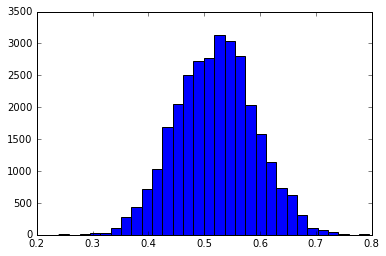

In [181]:
# Posterior of 'a0'

plt.hist(mcmc.trace('a0')[:], bins=30)

In [182]:
mean_a0 = np.mean(mcmc.trace('a0')[:])
mean_a1 = np.mean(mcmc.trace('a1')[:])

print ('Mean a0: ', mean_a0)
print ('Std. Dev. a0: ', np.var(mcmc.trace('a0')[:])**0.5)

print '\n'
print ('Mean a1: ', mean_a1)
print ('Std. Dev. a1: ', np.var(mcmc.trace('a1')[:])**0.5)

sd_a0 = np.var(mcmc.trace('a1')[:])**0.5
sd_a1 = np.var(mcmc.trace('a1')[:])**0.5

a0_samples = [round(s, 2) for s in mcmc.trace('a0')[:]]
a1_samples = [round(s, 2) for s in mcmc.trace('a1')[:]]

from scipy import stats
mode_a0 = stats.mode(a0_samples)[0][0]
mode_a1 = stats.mode(a1_samples)[0][0]

print ('Mode a0: ', mode_a0)
print ('Mode a1: ', mode_a1)

('Mean a0: ', 0.52029765827949959)
('Std. Dev. a0: ', 0.070669292038344225)


('Mean a1: ', 0.06994942293001935)
('Std. Dev. a1: ', 0.011485578633969807)
('Mode a0: ', 0.53000000000000003)
('Mode a1: ', 0.070000000000000007)


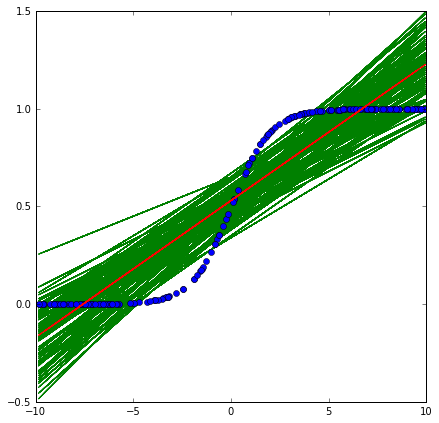

In [183]:
sample_ixs = np.random.choice(np.arange(len(a0_samples)), size=100)
all_samples = zip(a0_samples, a1_samples)

sample_lines = [all_samples[i] for i in sample_ixs]

plt.figure(figsize= (7, 7))

for line in sample_lines:
    plt.plot(X_sig, line[0] + line[1] * X_sig, 'g')
    
plt.plot(X_sig, y_sig, 'o', X_sig, mode_a0 + X_sig * mode_a1, 'r--')

In [156]:
X_test = np.arange(np.min(X_sig), np.max(X_sig), 1)
y_pred = mode_a0 + X_test * mode_a1

print (y_pred.shape)

(20,)


In [157]:
variance_y = 1 / ((1 / sd_a1) + (1 / np.var(X_sig)**0.5))
print variance_y

0.0163184136946


<Container object of 3 artists>

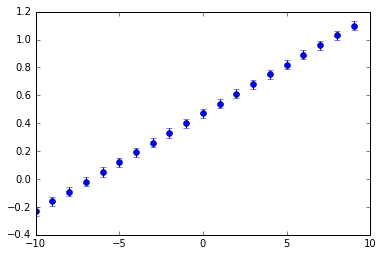

In [158]:
ci_95 = [(y_i - 2 * variance_y, y_i + 2 * variance_y) for y_i in y_pred]

plt.errorbar(x = X_test, y = y_pred, yerr=[(top - bottom) / 2 for (top, bottom) in ci_95], fmt='o')